__Data Initiation__

Initiate imports

In [1]:
!pip install folium

     |████████████████████████████████| 102kB 7.6MB/s ta 0:00:011


In [2]:
import types
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import folium
from collections import Counter

Import data from downloaded csv

In [3]:
# The code was removed by Watson Studio for sharing.

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


__Initial dataframe cleaning__

Remove all items with an availability of 0 days and 0 reviews:

In [4]:
df2= df[df['number_of_reviews']!= 0]
df3 = df2[df2['availability_365']!=0]
df3.shape

(26155, 16)

In [5]:
df3.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.615500e+04,2.615500e+04,26155.000000,26155.000000,26155.000000,26155.000000,26155.000000,26155.000000,26155.000000,26155.000000
mean,1.932026e+07,7.457478e+07,40.727482,-73.947724,149.885184,6.585739,38.193615,1.810126,6.989715,170.613496
std,1.121094e+07,8.261701e+07,0.056936,0.051476,198.816962,19.602095,54.359918,1.805707,31.807739,124.153024
min,2.539000e+03,2.571000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,9.457278e+06,7.365834e+06,40.687030,-73.982410,70.000000,1.000000,5.000000,0.450000,1.000000,53.000000
50%,2.078323e+07,3.528109e+07,40.721670,-73.953040,109.000000,2.000000,16.000000,1.230000,1.000000,160.000000
75%,2.950917e+07,1.316471e+08,40.763030,-73.929220,175.000000,4.000000,49.000000,2.680000,3.000000,292.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,9999.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
hoods = df3['neighbourhood_group'].unique().tolist()
neighbourhood_df = []

for hood in hoods:
    neighbourhood_df.append(df3[df3['neighbourhood_group'].str.contains(hood)])

manhattan = neighbourhood_df[1]

In [7]:
manhattan.shape

(10813, 16)

In [8]:
from collections import Counter
reviews = Counter(manhattan['number_of_reviews'])
reviews_df = pd.DataFrame.from_dict(reviews, orient='index').sort_index(0)
print(reviews_df.head(15))

       0
1   1110
2    740
3    587
4    490
5    412
6    334
7    329
8    341
9    255
10   219
11   219
12   188
13   173
14   148
15   150


Text(0.5, 1.0, 'Number of reviews vs. Occurence')

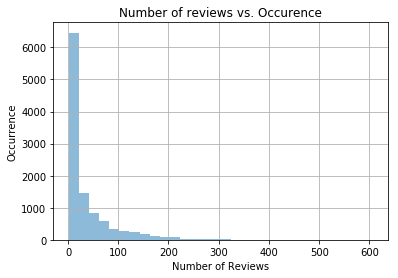

In [9]:
manhattan['number_of_reviews'].hist(bins = 30, alpha=0.5)

plt.xlabel("Number of Reviews")
plt.ylabel("Occurrence")
plt.title("Number of reviews vs. Occurence")

Drop all listings with less than 20 reviews

In [10]:
manhattan = manhattan[manhattan['number_of_reviews']>=20]

In [11]:
manhattan.shape

(4596, 16)

Check how many listings and listing types are available per neighbourhood

In [12]:
type = Counter(manhattan['room_type'])
type_df = pd.DataFrame.from_dict(type, orient = 'index')
type_df.rename(columns={0:'Number of listings per type'}, 
                 inplace=True)
type_df

,Number of listings per type
Entire home/apt,2440
Private room,2033
Shared room,123


In [13]:
manhattan = manhattan[manhattan['room_type']=='Entire home/apt']

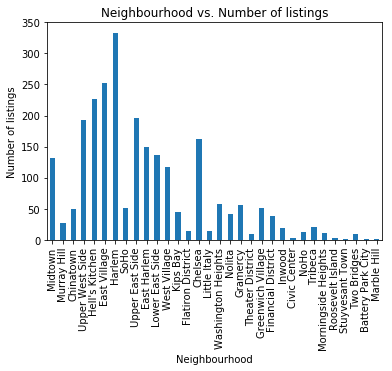

In [14]:
from collections import Counter
neighbourhood_counts = Counter(manhattan['neighbourhood'])
barplot = pd.DataFrame.from_dict(neighbourhood_counts, orient='index')

barplot.plot(kind = 'bar')
plt.ylabel("Number of listings")
plt.xlabel("Neighbourhood")
plt.title("Neighbourhood vs. Number of listings")
plt.legend('',frameon=False)

Since Foursquare is limited to 500 requests a day, we will focus only on Harlem. This neighbourhood has the most listings

Check how many values are left in the Manhattan data subset

In [15]:
harlem = manhattan[manhattan['neighbourhood']=='Harlem']
harlem = harlem[['name', 'longitude','latitude','minimum_nights', 'availability_365','price']]
harlem.shape

(333, 6)

In [16]:
harlem.describe()

,longitude,latitude,minimum_nights,availability_365,price
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,-73.947228,40.814401,5.327327,169.843844,177.894895
std,0.004749,0.008532,8.163488,110.718735,106.076032
min,-73.957980,40.798910,1.000000,1.000000,49.000000
25%,-73.950160,40.807350,2.000000,55.000000,120.000000
50%,-73.946650,40.813330,3.000000,188.000000,150.000000
75%,-73.943750,40.822150,4.000000,264.000000,200.000000
max,-73.936340,40.831350,60.000000,364.000000,1000.000000


Text(0.5, 1.0, 'Occurence of Airbnb listing prices')

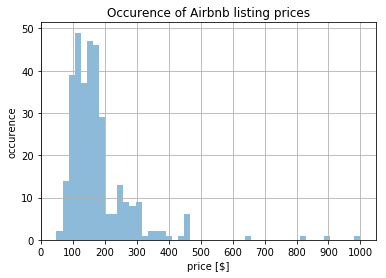

In [17]:
harlem['price'].hist(bins = 50, alpha=0.5)
plt.xlabel('price [$]')
plt.ylabel('occurence')
plt.xticks(np.arange(0, 1001, 100))
plt.title('Occurence of Airbnb listing prices')

In [18]:
harlem = harlem.reset_index(drop=True)
harlem.head(5)

,name,longitude,latitude,minimum_nights,availability_365,price
0,BEST BET IN HARLEM,-73.94478,40.81175,7,309,150
1,Spacious luminous apt Upper West NYC,-73.95136,40.82915,31,209,110
2,Sugar Hill Rest Stop,-73.94919,40.82754,2,318,170
3,ACCOMMODATIONS GALORE #1,-73.94894,40.81618,3,213,120
4,ACCOMMODATIONS GALORE#3. 1-5 GUESTS,-73.94791,40.81526,3,231,165


Now plot each listing on an interactive map

In [19]:
m = folium.Map(location = [40.8116, -73.9465], zoom_start = 14)

location = harlem[['latitude', 'longitude']]
locationlist = location.values.tolist()

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],popup=harlem.iloc[point]['price'], tooltip = harlem.iloc[point]['name']).add_to(m)
    folium.vector_layers.CircleMarker(locationlist[point], radius=50, color = 'red').add_to(m)
m

# Foursquare information

Obtain area information from Foursquare for each of the remaining listings in the Harlem dataframe

In [20]:
#Import required libraries
import requests
from pandas.io.json import json_normalize

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


Setup Foursquare credentials etc. (hidden)

In [22]:
# The code was removed by Watson Studio for sharing.

Get all venues within a radius of 100m of the Airbnb listing

In [23]:
#Prevent requesting twice and having to wait an additional day for 550 free requests
Downloaded = False

In [24]:
# Create a list of airbnbs without venues in 100m
novenue = []
dictlist = []

if Downloaded == False:
    for point in range(0,len(locationlist)): 
        radius = 100

        longitude = harlem['longitude'][point]
        latitude = harlem['latitude'][point]
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)


        url

        # create request
        results = requests.get(url).json()
        try:
            items = results['response']['groups'][0]['items']

            # format data
            dataframe = json_normalize(items)
            # filter columns
            filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
            dataframe_filtered = dataframe.loc[:, filtered_columns]

            # filter the category for each row
            dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

            # clean columns
            dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

            dictlist.append(dataframe_filtered)

        except:
            print(point, 'no venues')
            novenue.append(point)

    venuelistlen = len(dictlist)
    if point == len(locationlist):
        Downloaded = True

#example of foursquare output
dictlist[0]

1 no venues
3 no venues
14 no venues
16 no venues
20 no venues
25 no venues
31 no venues
37 no venues
38 no venues
41 no venues
45 no venues
48 no venues
53 no venues
54 no venues
61 no venues
63 no venues
75 no venues
80 no venues
90 no venues
93 no venues
101 no venues
105 no venues
107 no venues
109 no venues
111 no venues
116 no venues
117 no venues
126 no venues
136 no venues
141 no venues
143 no venues
156 no venues
160 no venues
162 no venues
169 no venues
170 no venues
172 no venues
174 no venues
176 no venues
185 no venues
186 no venues
202 no venues
208 no venues
214 no venues
220 no venues
230 no venues
231 no venues
236 no venues
239 no venues
244 no venues
249 no venues
252 no venues
254 no venues
258 no venues
262 no venues
263 no venues
265 no venues
274 no venues
275 no venues
281 no venues
286 no venues
287 no venues
295 no venues
297 no venues
300 no venues
303 no venues
304 no venues
316 no venues
321 no venues
330 no venues


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,New Amsterdam Musical Association,Jazz Club,107 W 130th St,US,New York,United States,btwn 6th and 7th avenue,96,"[107 W 130th St (btwn 6th and 7th avenue), New...","[{'label': 'display', 'lat': 40.811374, 'lng':...",40.811374,-73.943746,10027,NY,4d59bdfa3358a0900e718a44


Filtering Airbnbs without any venues within a 100m radius

In [25]:
len(novenue)

70

As 63 listings had no venues nearby, those were removed from the Harlem dataframe

In [26]:
for listing in range(0, len(novenue)):
    harlem.drop(listing, inplace=True)

In [27]:
harlem = harlem.reset_index(drop=True)
print(harlem.shape)
harlem.head(5)

(263, 6)


,name,longitude,latitude,minimum_nights,availability_365,price
0,City Life in Harlem,-73.95638,40.80494,5,12,105
1,Comfortable Strivers Row Hideaway - Monthly Re...,-73.94577,40.81781,30,331,110
2,A beautiful modern 3 bedroom apt,-73.94127,40.80879,1,252,290
3,Cozy Studio Close to Central Park,-73.95667,40.80185,2,339,175
4,Cozy 5 Bdrm in Historic Harlem NY,-73.94358,40.82931,3,273,345


Statistics for how many venues are to each listing and what those venues are

In [77]:
dictlist[1].categories.values
harlemclust = harlem.copy()
harlemclust = harlemclust.drop(['price','name'], axis = 1)

263


(array([112.,  27.,  46.,  18.,  34.,   4.,   5.,   4.,   8.,   1.,   4.]),
 array([ 1.        ,  2.45454545,  3.90909091,  5.36363636,  6.81818182,
         8.27272727,  9.72727273, 11.18181818, 12.63636364, 14.09090909,
        15.54545455, 17.        ]),
 <a list of 11 Patch objects>)

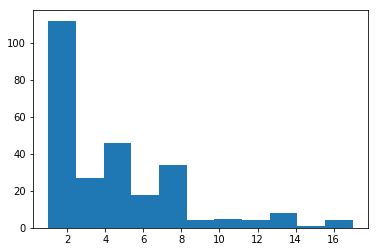

In [78]:
nrvenue = []
venuetype = []
print(len(dictlist))
for i in range(0, len(dictlist)):
    nrvenue.append(len(dictlist[i]))
    for j in range(0, len(dictlist[i].categories)):
        venuetype.append(dictlist[i].categories.values[j])
plt.hist(nrvenue, bins='auto')

Many listings have only a few venues within 100m radius while few have many as can be seen from the histogram.

What type of venues are found for all listings?

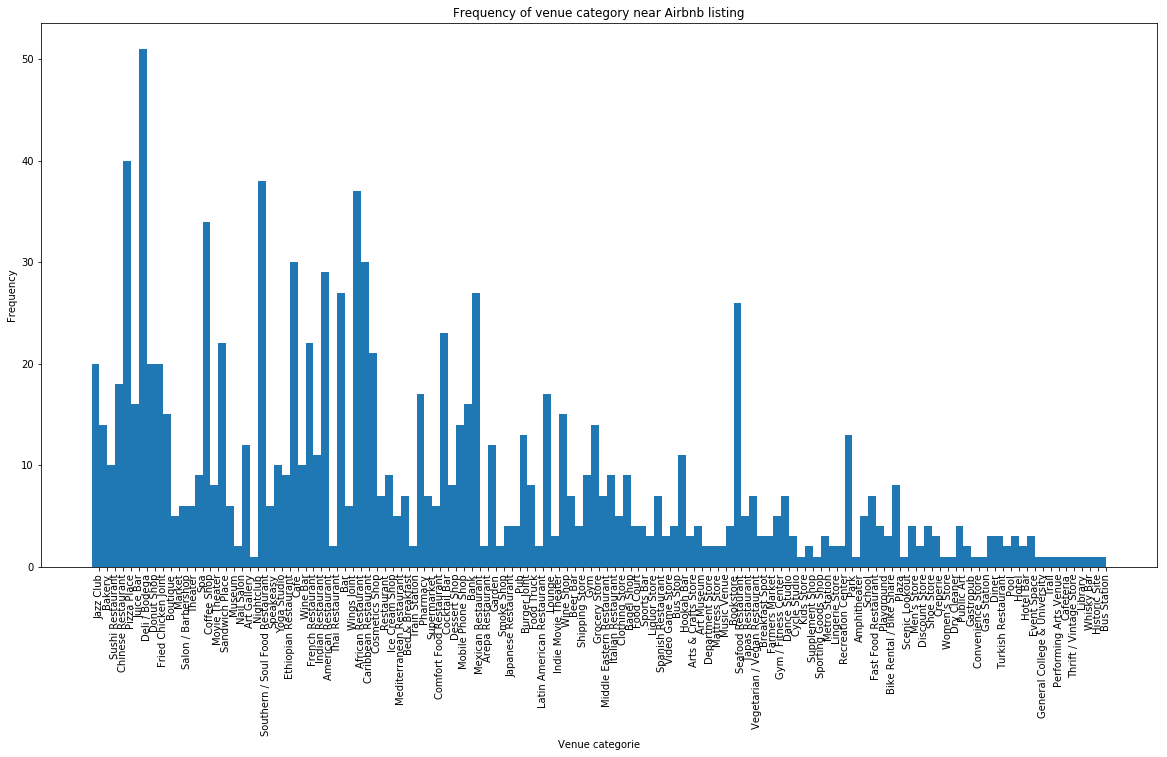

In [79]:
plt.figure(figsize=(20,10))
labels, values = zip(*Counter(venuetype).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels,rotation='vertical')
plt.xlabel('Venue categorie')
plt.ylabel('Frequency')
plt.title('Frequency of venue category near Airbnb listing')
plt.show()


Now lets combine the harlem dataset and the nearby venues

In [168]:
unique_ven = list(set(venuetype))
matrix = np.zeros((len(harlem), len(unique_ven)))
for i in range(0, len(harlem)):
    for j in range(0,len(unique_ven)):
        if venuetype[j] in dictlist[i].categories.values:
            matrix[i][j] = 1

venuedf = pd.DataFrame(matrix)
venuedf.columns = unique_ven
pricedf = harlem['price']
clusteringdf = harlemclust.merge(venuedf,left_index = True, right_index = True)
clusteringdf.head(10)
columnnames = clusteringdf.columns.values.tolist()

Now we the dataset is setup, we can start trying to identify how we can base the prices of a new Airbnb listing based on the parameters described above.

First we will try to fit a decision tree regression model:

Accuracy: -0.07 (+/- 0.11)
Best setting for decision tree depth and corresponding score:
5 0.05120351918238919
Comparison of results for how well the model is able to predict prices


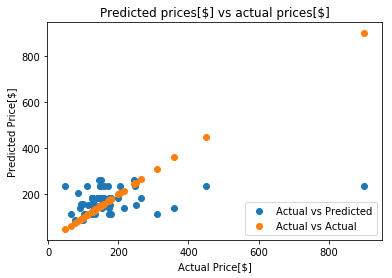

In [175]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statistics import *
from sklearn.decomposition import *
from sklearn.preprocessing import StandardScaler

X = clusteringdf.values
y = pricedf.values

scores = []
for k in range(1,132):
    clf = DecisionTreeRegressor(max_depth = k)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    if k == 5:
        plt.scatter(y_test,clf.predict(X_test))

print("Accuracy: %0.2f (+/- %0.2f)" % (mean(scores), stdev(scores) * 2))
print('Best setting for decision tree depth and corresponding score:')
print(np.argmax(scores)+1, scores[np.argmax(scores)])

print('Comparison of results for how well the model is able to predict prices')
plt.scatter(y_test,y_test)
plt.title('Predicted prices[\$] vs actual prices[\$]')
plt.xlabel('Actual Price[\$]')
plt.ylabel('Predicted Price[\$]')
plt.legend(['Actual vs Predicted', 'Actual vs Actual'], loc='lower right')

The correlation of score is presented here in combination with maximum decision tree depth

Text(0, 0.5, 'Score')

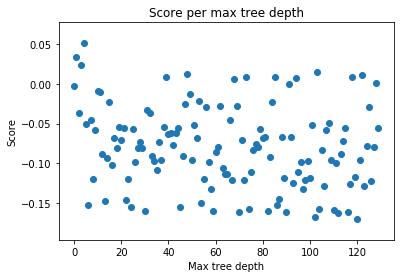

In [105]:
plt.figure
plt.scatter(np.arange(0, len(scores)),scores)
plt.title('Score per max tree depth')
plt.xlabel('Max tree depth')
plt.ylabel('Score')

Since the Decision tree regression performs bad, a polynomial regression is tried:

In [169]:
from sklearn import linear_model
import statsmodels.api as sm

X = clusteringdf.values
y = pricedf.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) 
print_model = model.summary('price',columnnames)

print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     14.09
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.02e-38
Time:                        13:07:47   Log-Likelihood:                -1227.3
No. Observations:                 210   AIC:                             2575.
Df Residuals:                     150   BIC:                             2775.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
longitude 

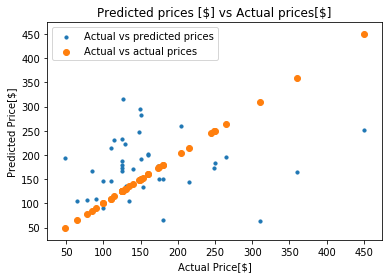

In [141]:
plt.scatter(y_test, y_pred, s=10)
plt.scatter(y_test,y_test)
plt.title('Predicted prices [\$] vs Actual prices[\$]')
plt.xlabel('Actual Price[\$]')
plt.ylabel('Predicted Price[\$]')
plt.legend([ 'Actual vs predicted prices','Actual vs actual prices'])
plt.show()


In [145]:
labels[99], labels[103], labels[105]

('Playground', "Men's Store", 'Shoe Store')

In [146]:
labels[74], labels[25], labels[38]

('Hookah Bar', 'Café', 'Mediterranean Restaurant')